In [ ]:
%matplotlib inline

In [ ]:
import stats_enriched_tweets
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpltools import style
import numpy as np
from collections import Counter, OrderedDict
import pandas as pd
import plotly.plotly as py

filename_pre = "/home/muntean/brexit-enriched/all-brexit-with-sent_pre-lines.json"
filename_post = "/home/muntean/brexit-enriched/all-brexit-with-sent_post-lines.json"

In [ ]:
def tweetIter(inputfile):
    """
    Iterates a JSON file containing enriches tweets
    :param inputfile: the file to iterate over
    :return:
    """
    for line in codecs.open(inputfile, "r", "utf-8"):
        try:
            tweet = json.loads(line)
        except:
            print "Couldn't parse tweet: ", line[:200]
        yield tweet

# build all dicts while reading

In [ ]:
# 1. PRE and POST
# Given a file (PRE or POST): 
#    - we need daily volumes 
#    - we need country volumes

pre_tweetIndex = stats_enriched_tweets.createTweetIndex(filename_pre)
print len(pre_tweetIndex)

post_tweetIndex = stats_enriched_tweets.createTweetIndex(filename_post)
print len(post_tweetIndex)

In [ ]:
# 2. masks over tweet index pre
print "PRE brexit"
pre_dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(pre_tweetIndex)
print "Daily tweets - volumes:", len(pre_dailyTweetsDict)
pre_userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(pre_tweetIndex)
print "User country tweets - volumes - EU:", len(pre_userCountryTweetsDict)


In [ ]:
for k,v in pre_dailyTweetsDict.iteritems():
    print k, len(v)

In [ ]:
for k,v in pre_userCountryTweetsDict.iteritems():
    print k, len(v)

In [ ]:
# 2. masks over tweet index post
print "POST brexit"
post_dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(post_tweetIndex)
print "Daily tweets - volumes:", len(post_dailyTweetsDict)

In [ ]:
post_userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(post_tweetIndex)
print "User country tweets - volumes - EU:", len(post_userCountryTweetsDict)

In [ ]:
for k,v in post_dailyTweetsDict.iteritems():
    print k, len(v)

In [ ]:
for k,v in post_userCountryTweetsDict.iteritems():
    print k, len(v)

# plot types

In [ ]:
def plotBarWithLables(distrib, labels, title, rot=0):
    style.use('ggplot')
    plt.figure()
    ind = np.arange(len(distrib))
    the_plot = plt.bar(ind, distrib, width = 0.75, align='center', color='k', log=True)
    the_plot[5].set_color('r')
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.title(title, fontsize = 10)
    plt.ylabel('Number of tweets', fontsize = 10)
    plt.tight_layout()
    plt.xlim(xmin=-1, xmax=17)
#     plt.ylim(ymax=75000)
    plt.savefig("/home/muntean/brexit-enriched/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [ ]:
def plotBarWithLables2Distrib(a,b, labels, title, rot=0):

    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='k', log=True)
    rects2 = ax.bar(ind + width, b, width, color='w', edgecolor='k', log=True)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of tweets')
#     ax.set_title(title)
    ax.set_xticks(ind + width)
    
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

    ax.legend((rects1[0], rects2[0]), ('Pre-Brexit', 'Post-Brexit'), loc='upper right')
    
#     def autolabel(rects):
#         # attach some text labels
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')
    
#     autolabel(rects1)
#     autolabel(rects2)

#     plt.tight_layout()
    plt.savefig("/home/muntean/brexit-enriched/plots/"+ title.replace(" ","_") + ".pdf")
    plt.show()

In [ ]:
#### plot RED, YELLOW

def plot2ColorLines(distributionsDict, variableNames, plotname):
    
    lineNames = sorted(variableNames) # 20 countries
    ind = range(len(lineNames)) # 0:19
    days = dailyMentionDict.keys() # 0:29
    
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, 10, 1000)
    ax.plot(y1);
    ax.plot(y2);
    

In [260]:
#### line plots
def plotLines(dailyMentionDict, variables, plotname):
    
    # http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    # Now that the plot is prepared, it's time to actually plot the data!    
    # Note that I plotted the majors in order of the highest % in the final year.    
#     majors = ['Syria', 'Iran', 'United Kingdom', 'Iraq',    
#               'Germany', 'Hungary', 'Israel',    
#               'Ivory Coast', 'Russia', 'Nigeria',    
#               'Turkey', 'Yemen', 'India',    
#               'France', 'Greece', 'Libya',    
#               'Austria', 'Italy', 'China', 'Lebanon'] 

#     majors = ["Croatia", "Hungary", "Austria", "Germany", "Serbia", "Macedonia", "Greece", "United Kingdom"]
    
    majors_alpha = sorted(variables) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29

  
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
#     plt.ylim(10, 1000)    
#     plt.xlim(-1, 6)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)
    
    ### devo iterare il dizionario in modo verticale
    for rank, mention in enumerate(variables):           
        mentionValues = list()
        for day in days:
            mentionsFreq = {x : y for [x, y] in dailyMentionDict[day]}
            mentionValues.append(0 if mention not in mentionsFreq else mentionsFreq[mention])
        
        data = np.array(mentionValues)
        print data

        plt.plot(range(len(data)), data,lw=2.5, color=tableau20[rank], label = " ".join([x.capitalize() for x in mention.split()]))  
        
#     plt.legend(loc='upper left')
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.ylabel("Number of tweets")
    plt.savefig(plotname)
    plt.show()

# plots literally

#### tweets per day

In [263]:
def plotTweetsPerDay(tweetsPerDayDict1, tweetsPerDayDict2):
    tweetsPerDay1 = [[len(y), x] for x, y in tweetsPerDayDict1.items() if x is not None and len(y)>20000]
    tweetsPerDay2 = [[len(y), x] for x, y in tweetsPerDayDict2.items() if x is not None and len(y)>20000]
    print tweetsPerDay1
    print tweetsPerDay2
    
    tweetsPerDay = tweetsPerDay1 + [[288091, 20160623]] + tweetsPerDay2
    print tweetsPerDay
    
    tweetsPerDay.sort(key = lambda row: row[1])
    #print tweetsPerDay
    print "Tweets per day", len(tweetsPerDay)
    
    values = list(zip(*tweetsPerDay)[0])
    #print values
    labels = list(zip(*tweetsPerDay)[1])
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    print new_labels
    #print labels
    plotBarWithLables(values, new_labels, "Number of tweets per day", rot=90)

[[23677, 20160618], [33389, 20160619], [49577, 20160620], [55435, 20160621], [69550, 20160622]]
[[42564, 20160704], [331895, 20160624], [84164, 20160625], [91813, 20160626], [130235, 20160627], [84284, 20160628], [61895, 20160629], [38694, 20160630], [39825, 20160701], [31806, 20160702], [30869, 20160703]]
[[23677, 20160618], [33389, 20160619], [49577, 20160620], [55435, 20160621], [69550, 20160622], [288091, 20160623], [42564, 20160704], [331895, 20160624], [84164, 20160625], [91813, 20160626], [130235, 20160627], [84284, 20160628], [61895, 20160629], [38694, 20160630], [39825, 20160701], [31806, 20160702], [30869, 20160703]]
Tweets per day 17
['06-18', '06-19', '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30', '07-01', '07-02', '07-03', '07-04']


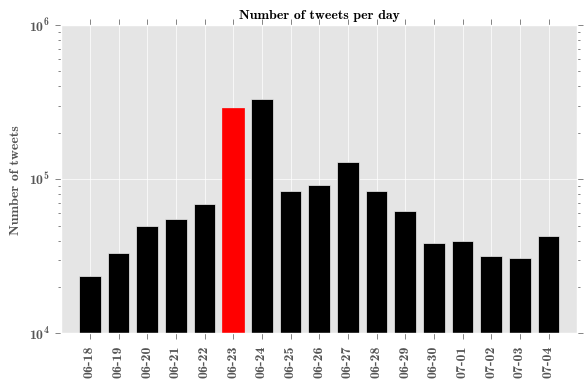

In [264]:
plotTweetsPerDay(pre_dailyTweetsDict, post_dailyTweetsDict)

#### tweets per country

In [ ]:
import numpy
def plotTweetsPerCountryPrePost(pre_tweetsPerCountryDict, post_tweetsPerCountryDict):
    
    pre_tweetsPerCountry = [[len(y), x] for x, y in pre_tweetsPerCountryDict.items() if x is not None]
    post_tweetsPerCountry = [[len(y), x] for x, y in post_tweetsPerCountryDict.items() if x is not None]
    
    print pre_tweetsPerCountry
    
    #sum countries
    countryDict = defaultdict()
    for item in pre_tweetsPerCountry:
        countryDict[item[1]] = item[0] 
    for item in post_tweetsPerCountry:
        if item[1] in countryDict:
            countryDict[item[1]] += item[0]
        
    countryDictSorted = sorted(countryDict.iteritems(), key=lambda x: x[1], reverse=True)  # order by frequency
    print countryDictSorted
    
    
    labels = [x for [x,y] in countryDictSorted[:20]]
    print labels

    
    pre_freq = list()
    pre_countries = {y : x for [x,y] in pre_tweetsPerCountry}
    for country in labels:
        pre_freq.append(pre_countries[country])
    print pre_freq
    
    post_freq = list()
    post_countries = {y : x for [x,y] in post_tweetsPerCountry}
    for country in labels:
        post_freq.append(post_countries[country])
    print post_freq

    labels[0] = u"UK"  # ok????
    print labels
    plotBarWithLables2Distrib(pre_freq, post_freq, labels, "tweets_per_Country_pre_post_log_scale", rot=90)
#     plotBarWithLables2Distrib(pre_freq, post_freq, labels, "tweets_per_Country_pre_post", rot=90)

In [ ]:
plotTweetsPerCountryPrePost(pre_userCountryTweetsDict, post_userCountryTweetsDict)

In [ ]:
def top20countryMentions(dailyTweetsDict, tweetIndex):   
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    # print len(sortedDailyTweetsDict)
    
    countryMentions = list()
    for day, tweetList in dailyTweetsDict.iteritems():
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["ht"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
    #topCountryMentions = Counter(countryMentions).most_common(20)
    topCountryMentions = Counter(countryMentions).most_common()
    
    return topCountryMentions

In [ ]:
### be aware of the difference between MENTIONS IN TEXT and HASHTAGS IN HASHTAG LIST

# politicians = ["david cameron", "theresa may", "nigel farage", "boris johnson", "david davis", "joe cox", 
#                "jeremy corbyn", "george osborne", "nicola sturgeon"]

politician_ht = ["jocox", "jocoxmp", "davidcameron", "cameron", "farage", "borisjohnson", "corbyn",
                 "sturgeon", "keepcorbyn", "corbynstays", "corbyn4all", "boris", "nigelfarage", 
                 "jeremycorbyn", "imwithcorbyn", "theresamay"]

politician_mentions = ["cameron", "david cameron", "theresa may", "nigel farage", "farage", 
                       "boris johnson", "johnson", "joe cox", "cox", 
                       "jeremy corbyn", "corbyn", "nicola sturgeon", "sturgeon"]

politician_synonims = {"jocox":"J. Cox", "jocoxmp":"J. Cox", "davidcameron":"D. Cameron", "cameron":"D. Cameron", 
                      "farage":"N. Farage", "borisjohnson":"B. Johnson", "corbyn":"J. Corbyn",
                       "sturgeon":"N. Sturgeon", "keepcorbyn":"J. Corbyn", "corbynstays":"J. Corbyn", 
                      "corbyn4all":"J. Corbyn", "boris":"B. Johnson", "nigelfarage":"N. Farage", 
                      "jeremycorbyn":"J. Corbyn", "imwithcorbyn":"J. Corbyn", "theresamay":"T. May",
                      "david cameron":"D. Cameron", "theresa may":"T. May", "nigel farage":"N. Farage",
                      "boris johnson":"B. Johnson", "johnson":"B. Johnson", "joe cox":"J. Cox", "cox":"J. Cox",
                      "jeremy corbyn":"J. Corbyn", "nicola sturgeon":"N. Sturgeon"}

# this could be interesting to see also the sentiment - or we can create some false things here?
parties_mentions = ["ukip", "labour", "tories", "tory", "conservatives", "unionist", "snp", "scotish national party", 
           "lib dems", "liberal democrat", "greens", "plaid cymru", "sinn fein", "green party"]
parties_synonims = {"ukip":"UKIP", "labour":"Labour Party", "tories":"Conservative Party", "tory":"Conservative Party", 
                    "conservatives":"Conservative Party", "unionist":"Union Party", "snp":"SNP", 
                    "scotish national party":"SNP", "lib dems":"Liberal Democrats", "liberal democrat":"Liberal Democrats",
                    "greens":"Green Party", "plaid cymru":"Plaid Cymru", "sinn fein":"Sinn Fein", "green party":"Green Party"}

In [ ]:
#### hashtags
pre_top20CountryMentions = top20countryMentions(pre_dailyTweetsDict, pre_tweetIndex)
print len(pre_top20CountryMentions)

post_top20CountryMentions = top20countryMentions(post_dailyTweetsDict, post_tweetIndex)
print len(post_top20CountryMentions)

In [ ]:
for k,v in enumerate(pre_top20CountryMentions[:100]):
    print k,v
pre_top_20 = [x for [x,y] in pre_top20CountryMentions[:20]]
print pre_top_20

In [ ]:
for k,v in enumerate(post_top20CountryMentions[:100]):
    print k,v
post_top_20 = [x for [x,y] in post_top20CountryMentions[:20]]
print post_top_20

In [ ]:
top20intersect = set(pre_top_20).intersection(set(post_top_20))
print top20intersect
# projecthope, projectfear
top20intersect.add(u'voteremain')
top20intersect.add(u'strongerin')
top20intersect.add(u'takecontrol')
top20intersect.add(u'inorout')
top20intersect.remove(u'eng')
top20intersect.remove(u'eu')
top20intersect.remove(u'uk')
print top20intersect

partial_ht = [u'voteleave', u'voteremain', u'leave', u'remain']

In [ ]:
def mentionsPerDay(dailyTweetsDict, tweetIndex, mentions, synDict=False):
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    #print sortedDailyTweetsDict
    
    dailyMentions = dict() 
    for day, tweetList in dailyTweetsDict.iteritems():
        mentionsList = list()
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                tweetText = tweetIndex[tweet_id]["text"].lower()  #string
                hashtagList = tweetIndex[tweet_id]["ht"]  #list
                for mention in mentions:
                    if mention in hashtagList:# or mention in tweetText:
                        if synDict is not False:
                            new_name = synDict[mention]
                            mentionsList.append(new_name)
                        else:
                            mentionsList.append(mention)
            topMentions = Counter(mentionsList).most_common()
            #print topMentions
            orderedTopMentions = sorted(topMentions, key=lambda tup: tup[0])
            #print orderedTopMentions
            dailyMentions[day] = orderedTopMentions
            
    # orderd date keys chronologically
    sortedDailyMentions = OrderedDict(sorted(dailyMentions.items(), key=lambda t: t[0]))
    return sortedDailyMentions



In [ ]:
# #### top hashtags pre and post
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, top20intersect)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]

# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, top20intersect)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]


# #### top parties pre and post
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, parties)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]

# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, parties)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]


### top politicians pre and post: politician_ht or politicians
pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, politician_ht, politician_synonims)
print pre_dailyMentionDict.keys()
print pre_dailyMentionDict
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]

post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, politician_ht, politician_synonims)
print post_dailyMentionDict.keys()
print post_dailyMentionDict
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]


# ### top politicians pre and post: politician_mentions
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, politician_mentions)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]

# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, politician_mentions)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]


# ### top politicians pre and post: politician MIXED hashtag and mentions
# all_politicians = politician_synonims.keys()
# pre_dailyMentionDict = mentionsPerDay(pre_dailyTweetsDict, pre_tweetIndex, all_politicians)
# print pre_dailyMentionDict.keys()
# print pre_dailyMentionDict[20160619]
# print pre_dailyMentionDict[20160620]

# post_dailyMentionDict = mentionsPerDay(post_dailyTweetsDict, post_tweetIndex, all_politicians)
# print post_dailyMentionDict.keys()
# print post_dailyMentionDict[20160624]
# print post_dailyMentionDict[20160629]


[ 15  32  37 120 163]
[18 66 69 22 23]
[145 229 104  87 149]
[0 0 1 0 0]
[0 1 0 0 0]
[326 174 218  79 119]
[ 42  88 102  45  88]


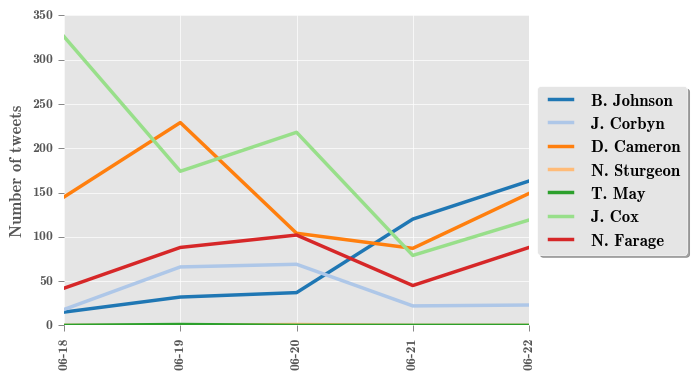

In [261]:
variableNames = set(politician_synonims.values())
plotLines(pre_dailyMentionDict, variableNames, "/home/muntean/brexit-enriched/plots/politician_ht_pre.pdf")

[ 482  147  173  233  133  147 1583  237   87   65  280]
[2444  997 2935 4419 3197 3370 1491 1564 1906 1271 1105]
[1226  155  169  163  110  120   66   36   30   25   58]
[24 18 75 23  8 24  3  1  3  6  2]
[  6   4   3   6  12  14 135  69  84  98  58]
[71 14 17 12  9 17  7  1  3  1  2]
[ 663  158   96   60  407  110   37   45   26   38 1416]


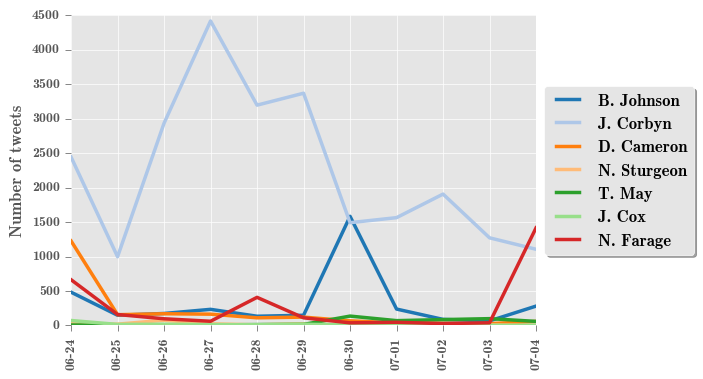

In [262]:
plotLines(post_dailyMentionDict, variableNames, "/home/muntean/brexit-enriched/plots/politician_ht_post.pdf")

[  15   32   37  120  163  482  147  173  233  133  147 1583  237   87   65
  280]
[  18   66   69   22   23 2444  997 2935 4419 3197 3370 1491 1564 1906 1271
 1105]
[ 145  229  104   87  149 1226  155  169  163  110  120   66   36   30   25
   58]
[ 0  0  1  0  0 24 18 75 23  8 24  3  1  3  6  2]
[  0   1   0   0   0   6   4   3   6  12  14 135  69  84  98  58]
[326 174 218  79 119  71  14  17  12   9  17   7   1   3   1   2]
[  42   88  102   45   88  663  158   96   60  407  110   37   45   26   38
 1416]


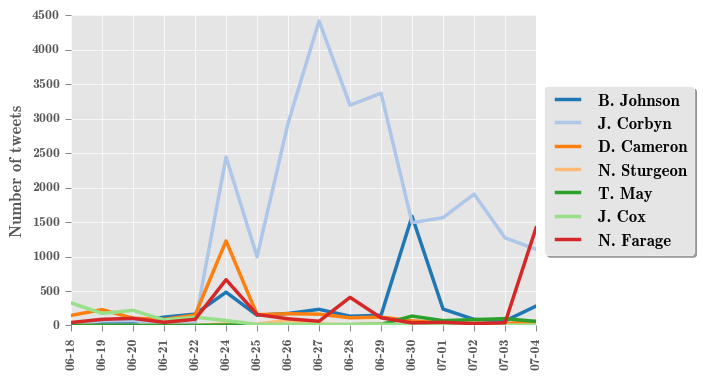

In [265]:
dest = pre_dailyMentionDict.copy()
dest.update(post_dailyMentionDict)
plotLines(dest, variableNames, "/home/muntean/brexit-enriched/plots/politician_ht_all.pdf")

## mentions and sentiments

In [ ]:
mentionSentiIndex = stats_enriched_tweets.buildCountrySentiIndexMention(filename)

In [ ]:
def plotCountrySentimentPerDay(dailySentiDict, countryName, days): #, generic_title):
    labels = list()
    against = list()
    pro = list()

    dailySentiDictSorted = sorted(dailySentiDict.iteritems(), key=lambda x: x[0])  # order by date
    for record in dailySentiDictSorted:
        day = record[0]
        if day in days:
            sentiList = record[1]
            labels.append(day)
            count_pro = sentiList.count(1)
            pro.append(count_pro)
            count_anti = sentiList.count(0)
            against.append(count_anti)
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    plotBarWithLables2Distrib(against, pro, new_labels, countryName.capitalize() + "_sentiment_per_Day", rot=90)

days = dailyMentionDict.keys()   
print len(days)
# plotCountrySentimentPerDay(mentionSentiIndex["syria"], "syria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days)
# plotCountrySentimentPerDay(mentionSentiIndex["germany"], "germany", days)
plotCountrySentimentPerDay(mentionSentiIndex["austria"], "austria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["united kingdom"], "united kingdom", days)
# plotCountrySentimentPerDay(mentionSentiIndex["nigeria"], "nigeria", days)
# #http://www.voanews.com/media/photogallery/europe-migrant-crisis-september-16-2015/2966005.html
# #08.09:http://www.theguardian.com/world/video/2015/sep/08/journalist-appears-to-kick-and-trip-fleeing-refugees-video
# plotCountrySentimentPerDay(mentionSentiIndex["hungary"], "hungary", days)
# plotCountrySentimentPerDay(mentionSentiIndex["greece"], "greece", days)
# plotCountrySentimentPerDay(mentionSentiIndex["serbia"], "serbia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["macedonia"], "macedonia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["croatia"], "croatia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["turkey"], "turkey", days)

## location mentions and uniq user sentiment


In [ ]:
mixedMentionUser = stats_enriched_tweets.buildMixCountryMentionUserSenti(filename)

In [ ]:
plotCountrySentimentPerDay(mixedMentionUser["france"], "france", days, " mention and user sentiment per day")
plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days, " mention and tweet sentiment per day")

In [ ]:
print mixedMentionUser["germany"][20150917].count(0)
print mentionSentiIndex["germany"][20150917].count(0)

In [ ]:
print mixedMentionUser["germany"][20150917].count(1)
print mentionSentiIndex["germany"][20150917].count(1)